##Problem Statement:
Snoring is an Health issue and it can be tracked by the vibration generated while sleeping /snoring, these vibrations should be pin pointed for better understanding the health consequences and disturbed sleep.

##Approach:
The data at first glance gives us an insight that the frequency measure at places where there is purportedly snoring observed is higher, that means more of data variations in short intervals whereas the vibrations are markedly lazy around normal breathing while asleep.

Calculated modes of each duration and multiple modes present is our candidate for instance of snoring.

The snoring could be thought about as Time series with trends and seasonality inherently latent may be additive or multiplicative as the case may be on further investigation. 
The data is a Time series and the problem statement comes under the purview of unsupervised learning technique application. 

The approach boils down to digging around the seasonality and then finding the trend or residuals which indicate other than the normal vibrations of the subject under study.Not able to decipher the trends and seasonality here.

## Solution in a different prespective...

###The problem could be broken down as the reference change from the previous value.hence getting the instances of snoring/normal , which can be segrerated as the difference value between 6 and beyond. ( Value of 6 arrived after trial and error).

##The above can be repeated and the results can be reproduced upon using DBSCAN using eps=0.65 and sample_size=15000( a minute of data)

Python (Jupyter notebook) is used for coding. The data is fetched and read into as Dataframe.
Scipy library of Python is used to get the trend insights. Statsmodels library is used to do the decompose to get the seasonality, trend and residuals.


In [1]:
from sklearn.cluster import KMeans# importing necessary libraries
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

In [2]:
path = 'E:\\Downloads\\turtleshelltechnologies-snoring1\\test_data'#ingesting the data to a Pandas DataFrame
X = pd.concat([pd.read_csv(f'E:\\Downloads\\turtleshelltechnologies-snoring1\\test_data\\{f}',header=None) for f in os.listdir(path) if f.endswith('.csv')],axis=0)

In [3]:
X.columns=['refer']

In [4]:
#Calculating modes of each duration and multiple modes present is our candidate for instance of snoring.
mde=[]
i=0
thisdict = {}
while i <len(X['refer'].iloc[0:X.shape[0]]):
    mde.append(str(X['refer'].iloc[i:i+250].mode()))
    i=i+250

In [5]:
#Multiple mode is segrerated as having value 1 for snoring signal.
lst=[]
import re
for i in range(len(mde)):
    x = len(re.findall("\n", mde[i]))
    if x>1:
        lst.append(1)
    else:
        lst.append(0)

Text(0.5, 1.0, 'Calculated_per_sec_Snoring')

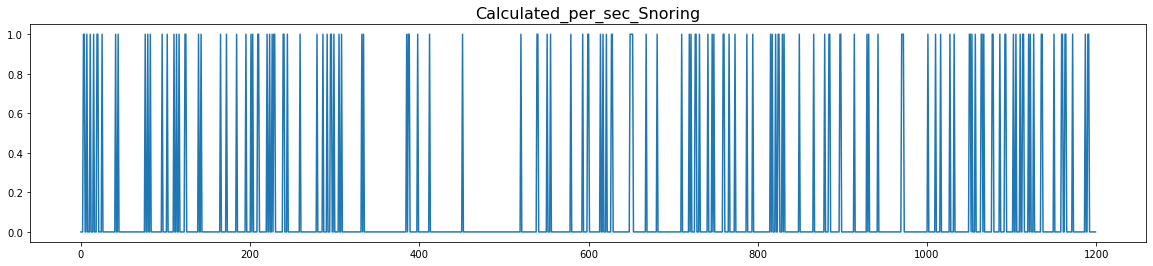

In [6]:
f = plt.figure()
f.set_figwidth(20)
plt.plot(lst)
plt.title('Calculated_per_sec_Snoring', fontsize=16)

Text(0.5, 1.0, 'Sample_Original_snoring')

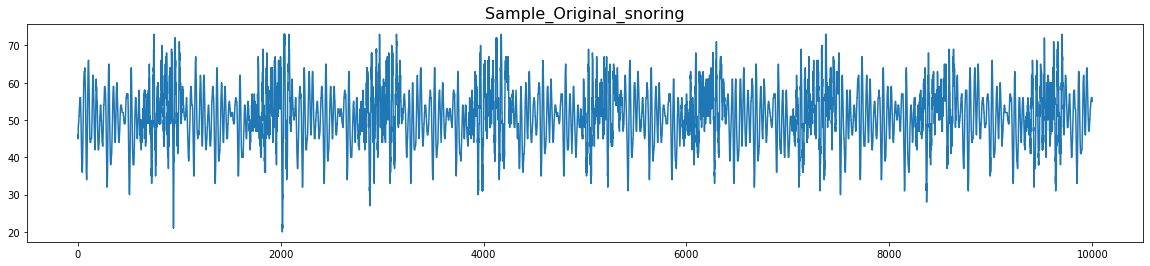

In [7]:
f = plt.figure()
f.set_figwidth(20)
plt.plot(X.iloc[0:10000])
plt.title('Sample_Original_snoring', fontsize=16)

In [8]:
from sklearn import preprocessing
scaler = preprocessing.MinMaxScaler()
X1 = pd.DataFrame(scaler.fit_transform(X),columns=['refer'])

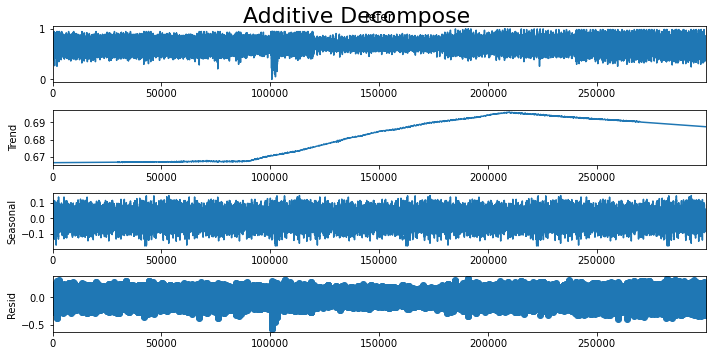

In [9]:
from statsmodels.tsa.seasonal import seasonal_decompose# decomposing to get insights
from dateutil.parser import parse


# Additive Decomposition
result_add = seasonal_decompose(X1['refer'], model='additive', extrapolate_trend='freq',period=60000)

# Plot
plt.rcParams.update({'figure.figsize': (10,5)})


result_add.plot().suptitle('Additive Decompose', fontsize=22)
plt.show()

## The date after decomposition shows marked vibrations after 90000th data point approx.
## The snoring is seasonal embedded in the sleep as the Original visualisation shows.
## ....................NO much insights here.......

In [10]:
difference = pd.DataFrame(X.diff().fillna(X))
difference.columns=['move']
X=pd.concat([X,difference], axis=1)
X

,refer,move
0,46,46.0
1,45,-1.0
2,45,0.0
3,45,0.0
4,45,0.0
...,...,...
59991,55,1.0
59992,54,-1.0
59993,51,-3.0
59994,42,-9.0


Text(0.5, 1.0, 'Sample_snoring_1st_4min')

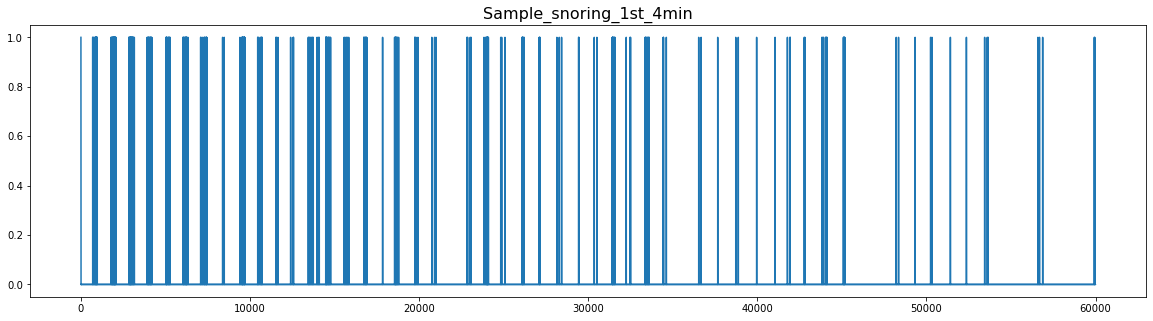

In [11]:
# the lag/shifted values as in the "move" column is interpreted as continous variations and the closer-----
#------the variations the more the chances of snoring related activity is.

conditions=[(X['move']) >6 , (X['move']) <-6, (X['move']) <6 , (X['move']) >-6]

values =[1,1,0,0]

X['difference'] = np.select(conditions,values) 
f = plt.figure()
f.set_figwidth(20)
plt.plot(X.difference.iloc[0:60000])
plt.title('Sample_snoring_1st_4min', fontsize=16)

##Using DBSCAN for breaking down the data to get outliers ..the snoring seconds

Number of clusters: 1
Outliers : 763


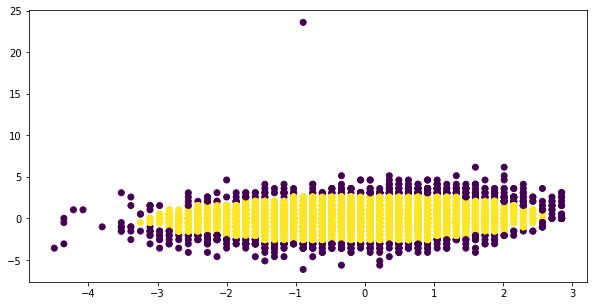

In [12]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
x_new1 = StandardScaler().fit_transform(X)
y_pred = DBSCAN(eps=0.65, min_samples=250).fit_predict(x_new1[0:15000])
print('Number of clusters: {}'.format(len(set(y_pred[np.where(y_pred != -1)]))))
print('Outliers :', len(y_pred[np.where(y_pred == -1)]))
plt.scatter(x_new1[0:15000,0], x_new1[0:15000,1], c=y_pred)

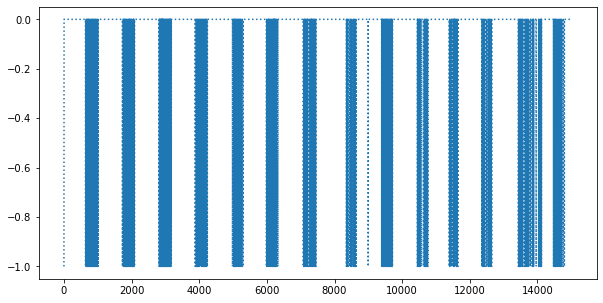

In [13]:
a = np.array(y_pred)
np.where(a == -1)[0]
#Visualizing the conclusion...
plt.plot(a, linestyle = 'dotted')

plt.show()#Snoring seconds across 1 minute..Almost 14 instances of snoring in a minute..